#  Laboratorium z Podstaw Przetwarzania Sygnałów
## Laboratorium 2 - podstawy przetwarzania sygnałów

prowadzący: dr inż. Łukasz Jeleń  
  
Dzisiejsze zadania pochodzą z Allen B. Downey, Think DSP, Digital Signal Processing in Python, Green Tea Press, Wersja 1.0.5

Nazwisko i Imię:  Foksińska Kinga  
Nr albumu:  255591  
data wykonania ćwiczenia: 25.10.2022  

w celu zachowania przeniesienia do kolejnej linii należy się upewnić, że na końcu linii znajduje się 2x spacja

## Zestaw narzędzi  

Na poprzednich zajęciach poznali Państwo narzędzia związane z pythonem. Dzisiaj proszę o zapoznanie się z narzędziami udostępnionymi przez Autora podręcznika "Think DSP". Zawiera on wiele przydatnych funkcji, które będziemy wykorzsytywali na zajęciach. W poniższej komórce macie Państo dane do ich pobrania. 

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-11-26 10:01:08--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-11-26 10:01:09--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.007s  

2022-11-26 10:01:09 (6.52 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



## Sygnały   
  
za:  
ThinkDSP  
Code examples from Chapter 1: Sounds and Signals  
Copyright 2015 Allen Downey  
License: Creative Commons Attribution 4.0 International

w oryginale można poczytać tutaj: http://tinyurl.com/thinkdsp01


Inicjalizacja syngnałów sinusoidalnych i cosinusoidalnych o zadanych parametrach

In [2]:
from thinkdsp import CosSignal, SinSignal

cos_sig = CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = SinSignal(freq=880, amp=0.5, offset=0)

wykres otrzymanych sygnałów

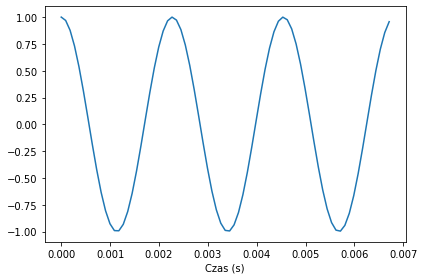

In [ ]:
from thinkdsp import decorate
#cosinus
cos_sig.plot()
decorate(xlabel='Czas (s)')

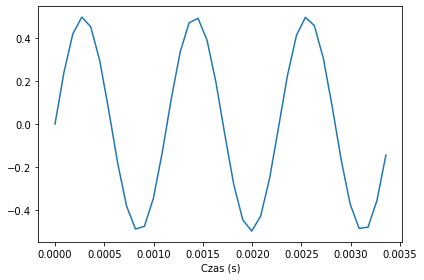

In [ ]:
#sinus
sin_sig.plot()
decorate(xlabel='Czas (s)')

Proszę zauważyć, że częstotliwość sinusa wzrosła dwukrotnie, co spowodowało zmniejszenie okresu o połowę.  
  
Teraz dodamy te sygnały do siebie i wyświtlimy ich przebieg.

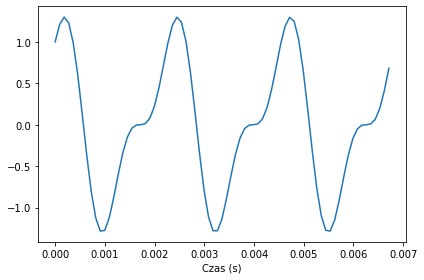

In [ ]:
mix = sin_sig + cos_sig
mix.plot()
decorate(xlabel='Czas (s)')

#### Wnioski  
Możemy zauażyć, że sygnał jest matematyczną funkcją dla wszystkich wartości w czasie. 

## Fale dźwiękowe

Falą będziemy nazywali oszcowanie wartości sygnału w równych odstępach czasowych. Częstotliwość próbkowania (framerate) będzie ilością próbek w sekundzie.  
  
Utwórzmy falę z naszej sumy sygnałów:

In [ ]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)

Jeśli nie mają Państwo zainstalowanego IPythona, to jest to dobry moment na doinstalowanie. Za pomocą widgetu IPythona możemy odsłuchać utworzoną przez nas falę dźwiękową. 

In [ ]:
from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

Teraz sprawdzimy jaka była ilość próbek oraz jaki był interwał między próbkami (wyznaczany jako odwrotność okresu). 

In [ ]:
# zmienna ys jest tablicą numpy, która przechowuje wartości naszego sygnału
print('Ilość próbek', len(wave.ys))
print('Interwał w ms', 1 / wave.framerate * 1000)

Ilość próbek 5512
Interwał w ms 0.09070294784580499


Sygnały okresowe będą dodatkowo posiadały właściwość 'period'. Natowmiast obiekt 'wave' posiada metodę 'segment', która pozwoli na utworzenie nowego obiektu fali. My wykorzystamy tę metodę do utworzenia fali składającej się z 3 okresów obiktu 'wave'.

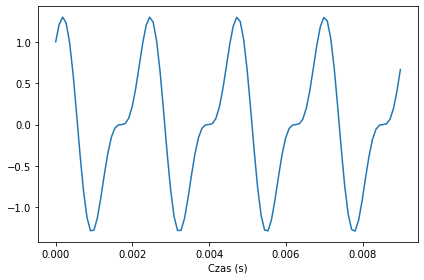

In [ ]:
period = mix.period
segment = wave.segment(start=0, duration=period*4) #proszę sprawdzić różnicę zmieniając mnożnik okresu
segment.plot()
decorate(xlabel='Czas (s)')

Kolejnymi opreacjami, które możemy wykonać na sygnale jest normalizacja w przedziale (-1,1) oraz tzw. tapering - wyciaszanie sygnału na początku i końcu w celu minimalizacji tzw. "kliknięcia" przy odtwarzaniu.

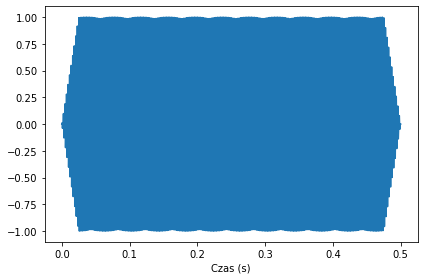

In [ ]:
# Normalizacja
wave.normalize()
# Tapering
wave.apodize()
# przebieg
wave.plot()
decorate(xlabel='Czas (s)')

Możemy teraz zapisać utworzony sygnał jako plik 'temp.wav'

In [ ]:
wave.write('temp.wav')

Writing temp.wav


oraz odczytać i odtworzyć.

In [ ]:
from thinkdsp import play_wave
play_wave(filename='temp.wav', player='aplay')

wave.make_audio()


## Pozostałe ćwiczenia  
  
również z Think DSP

### Zadanie 1

Ze strony http://freesound.org pobierz dźwięk zawierający muzykę, rozmowę lub inny dźwięk o dobrze zdefiniowanej tonacji. Z pobranego pliku pobierz ok. półsekundowy kawałek (patrz: wave.segment w przykładzie powyżej). Na tej podstawie wyznacz widmo sygnału oraz przedstaw na wykresie przebiek wybranego kawałka pliku. Zastanów się i podaj wniosek jaka jest zależność między barwą dźwięku a strukturą harmoniczną widoczną w wyznaczonym widmem. 

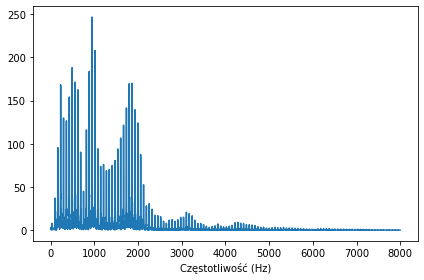

In [ ]:
from thinkdsp import read_wave
wave = read_wave(filename = "Freesound-quack_beat_120bpm.wav")
segment = wave.segment(start=0, duration=0.5)

spectrum = segment.make_spectrum()
spectrum.plot(high = 8000)
decorate(xlabel='Częstotliwość (Hz)')

**Wnioski**  
Widmo dźwięku ma decydujący wpływ na jego barwę, a przede wszystkim widoczne aplitudy oraz ich zmienność.  
Natężenie dźwięku w podanym fragmencie jest największe dla częstotliwości około 900 Hz. Jak łatwo zauważyć dla częstotliwości powyżej 2200 Hz natężenie nie przekracza 25 decybeli, zaś dla częstotliwości powyżej 8000 Hz natężenie jest tak małe, że aby zachować czytelność wykresu widma nie zostało ono uwzględnione.  
Przedstawione wyżej widmo mieści się w zakresie częstotliwości słyszalnych dla człowieka (od 16 Hz do 20 kHz). Jednak człowiek jest najbardziej wyczulony na dźwięki w częstotliwości 1kHz - 3 kHz. Dlatego też dźwięki powyżej 8000 Hz w podanym fragmencie mogą być słyszane jako szum, ze względu na małą różnicę w amplitudach natężenia - widmo jest bardziej zrównoważone niż w pozostałym zakresie częstotliwości.

Zastosuj filtr górno-, dolno-przepustowy oraz środkowozaporowy do odfitrowania stosownych harmonicznych. Następnie przekonwertuj wyniki spowrotem do fali dźwiękowej i odsłuchaj. Porównaj wyniki i odpowiedz na pytanie jak dźwięk koresponduje do zmian wprowadzonych do widma? Zapisz spostrzeżenia dla każdego filtra.

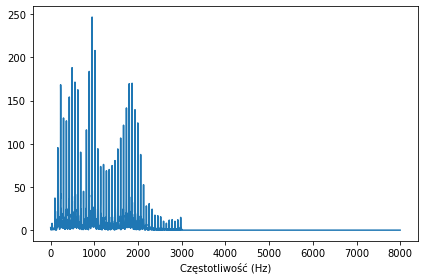

In [ ]:
#filtr dolnoprzepustowy
spectrum = spectrum
spectrum.low_pass(3000)
spectrum.plot(high = 8000)
decorate(xlabel='Częstotliwość (Hz)')
filtered_low = spectrum.make_wave()
filtered_low.normalize()
filtered_low.apodize()
filtered_low.make_audio()

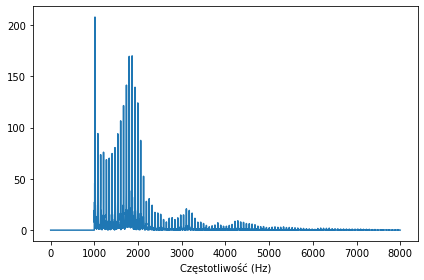

In [ ]:
#filtr górnoprzepustowy
spectrum.high_pass(1000)
spectrum.plot(high = 8000)
decorate(xlabel='Częstotliwość (Hz)')
filtered_high = spectrum.make_wave()
filtered_high.normalize()
filtered_high.apodize()
filtered_high.make_audio()

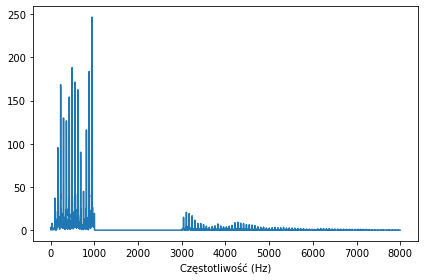

In [ ]:
#filtr środkowozaporowy
spectrum.band_stop(1000, 3000)
spectrum.plot(high = 8000)
decorate(xlabel='Częstotliwość (Hz)')
filtered_mid_cut = spectrum.make_wave()
filtered_mid_cut.normalize()
filtered_mid_cut.apodize()
filtered_mid_cut.make_audio()

**Wnioski**  
W przypadku filtra dolnoprzepustowego otrzymany dźwięk jest niższy od początkowego. Zgodnie z naszymi oczekiwaniami wszystkie dźwięki w częstotliwości powyżej 3 kHz zostały wytłumione.  
Dla filtru górnoprzepustowego zostały wytłumione dźwięki poniżej 1 kHz, co pozwala na lepsze usłyszenie wyższych tonów. Jeśli zwiększylibyśmy granicę różnica będzie jeszcze bardziej słyszalna.  
Filtr środkowozaporowy jest przeciwieństwem filtru środkowoprzepustowego, który pozwoliłby nam na jeszcze lepsze uniknięcie szumów w nagraniu, ponieważ moglibyśmy ograniczyć się do najbardziej słyszalnych dla człowieka zakresów. Użycie filtru środkowozaprowego sprawiło, że dźwięk jest mniej wyrazisty ze względu na usunięcie dźwięków z zakresu najbardziej słyszalnego dla człowieka. Słyszalne są również minimalne szumy.

### Zadanie 2

Stwórz syntetyczny sygnał poprzez zsumowanie utworzenych sygnałów sinusoidalnych i cosinusoidalnych (patrz przykłady powyżej). Przekonwertuj sygnał do fali dźwiękowej i posłuchaj jej. Następnie wyznacz widmo utworzonego sygnału oraz przedstaw jego przebieg na wykresie. Jaki będzie efekt jeżeli dodasz składowe częstotliwości, które nie jest wielokrotnością podstawowej składowej. 

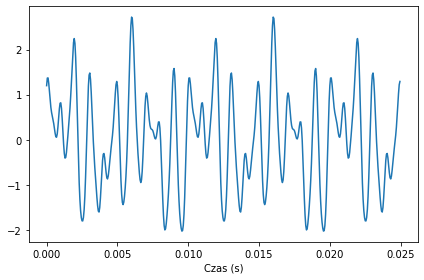

In [ ]:
from thinkdsp import CosSignal, SinSignal

cos_sig = CosSignal(freq=2000, amp=0.2, offset=0)
cos_sig2 = CosSignal(freq=1000, amp=1.0, offset=0)
sin_sig = SinSignal(freq=700, amp=1.0, offset=0)
sin_sig2 = SinSignal(freq=200, amp=0.6, offset=0)

mix = sin_sig + sin_sig2 + cos_sig + cos_sig2
wave = mix.make_wave(duration=2, start=0, framerate=20000)

period = mix.period
segment = wave.segment(start=0, duration=period*5)
segment.plot()
decorate(xlabel='Czas (s)')

from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

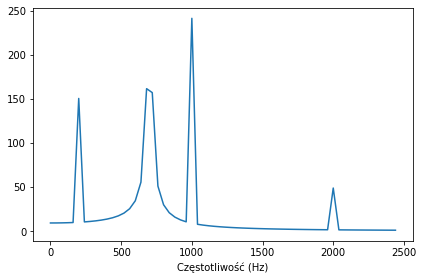

In [ ]:
spec = segment.make_spectrum()
spec.plot(high=2500)
decorate(xlabel='Częstotliwość (Hz)')

**Wnioski**  
Zmienna oznaczona sin_sig reprezentuje sygnał sinusoidalny o składowej częstotliwości, która nie jest wielokrotnością podstawowej składowej. Na wykresie widma zauważamy, że znacząco różni się od pozostałych - jego kształt został zdeformowany. Mimo iż amplituda tego sygnału powinna być równa aplitudzie sygnału cos_sig2 (cosinusoidalnego o częstotliwości 1 kHz) jest ona znacznie mniejsza i zbliżona do wartości 0.6 (która odpowiada sygnałowi sinusoidalnemu o częstotliwości 200 Hz - sin_sig2).

### Zadanie 3

Napisz funkcję o nazwie "stretch" lub "rozszerz", która pobiera falę dźwiękową (wave) oraz współczynnik rozszerzenia jako parametry. Zadaniem funkcji jest przyspieszenie lub opóźnienie dźwięku poprzez zmodyfikowanie czasu (ts) oraz częstotliwość (framerate). 

In [ ]:
#funkcja dodatkowo wyświetla początkowe paramtery fali dźwiękowej i następnie paramtery po modyfikacji
def stretch(wave,coverage_factor = 2): #dla współczynnika większego od 1 dźwięk będzie przyśpieszany, zaś dla współczynnika z przedziału 0<x<1 będzie opóźniany
  print("Początkowy czas: "+str(wave.duration))
  print("Początkowa częstotliwość: "+str(wave.framerate))
 
  wave.framerate = wave.framerate * coverage_factor
  #modyfikując częstotliwość (framerate) modyfikujemy jednocześnie czas (duration), który zgodnie z thinkdsp jest własnością wave i obliczany jest na podstawie framerate 
  
  print("Czas po modyfikacji: "+str(wave.duration))
  print("Częstotliwość po modyfikacji: "+str(wave.framerate))

#sprawdzenie poprawności działania funkcji na przykładzie fali dźwiękowej z poprzedniego ćwiczenia
stretch(wave, 0.5)
from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio


Początkowy czas: 2.0
Początkowa częstotliwość: 20000
Czas po modyfikacji: 4.0
Częstotliwość po modyfikacji: 10000.0
